In [0]:
# Manipulação de dados
import pandas as pd
import numpy as np
import random

# Aprendizado de Máquina
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Regressão para prever o comportamento do dólar

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [39]:
data_df = pd.read_csv("drive/My Drive/Colab Notebooks/PeixeBabel/USD_BRL mar-2017#mar-2020.csv")
data_df

,Data,Último,Abertura,Máxima,Mínima,Var%
0,16.03.2020,"5,0005","4,8600","5,0680","4,8600","2,90%"
1,13.03.2020,"4,8595","4,7100","4,8815","4,6426","1,42%"
2,12.03.2020,"4,7916","4,8154","5,0284","4,7496","-0,49%"
3,11.03.2020,"4,8152","4,6406","4,8289","4,6406","3,69%"
4,10.03.2020,"4,6439","4,6741","4,6881","4,6352","-1,71%"
...,...,...,...,...,...,...
798,22.02.2017,"3,0640","3,0960","3,0989","3,0604","-1,00%"
799,21.02.2017,"3,0951","3,0862","3,1083","3,0848","0,26%"
800,20.02.2017,"3,0870","3,1019","3,1074","3,0826","-0,57%"
801,17.02.2017,"3,1048","3,0871","3,1099","3,0796","0,50%"


# Preparando dados

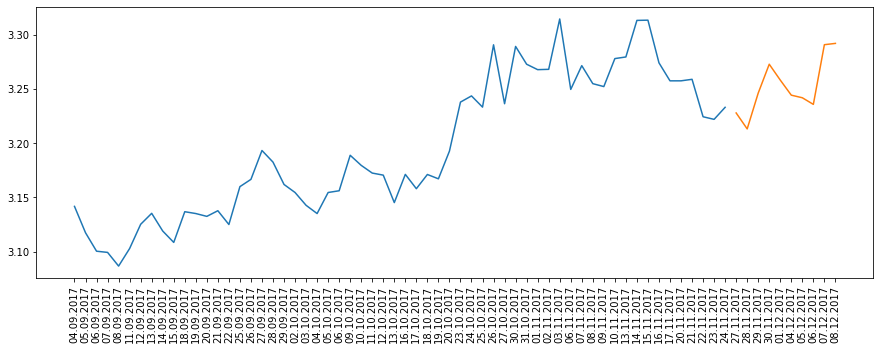

In [40]:
## Carregando dados de treino e validação
data_df['Preço']=data_df['Último'].apply(lambda x: float(x.split()[0].replace(',', '.')))
usd_price  = data_df['Preço'][::-1].to_numpy()
train_data = usd_price[:-30] #removendo o último mês

instancias = data_df.shape[0]
janela = 60
horizonte = 10

dates = data_df['Data'][::-1].to_numpy()
dates = dates[:-30]

X_train, Y_train, dates_train = [], [], []
for i in range(instancias):
  start = np.random.randint(0, len(train_data)-janela-horizonte)
  X_train.append(train_data[start:start+janela])
  Y_train.append(train_data[start+janela:start+janela+horizonte])
  dates_train.append(dates[start:start+janela+horizonte])

X_val = X_train[-5:]
Y_val = Y_train[-5:] 
dates_val = dates_train[-5:]

X_train = X_train[:-5]
Y_train = Y_train[:-5]

## Plot
plt.figure(figsize=(15, 5))
plt.plot(range(janela), X_train[2])
plt.plot(range(janela, janela+horizonte), Y_train[2])
plt.xticks(range(janela+horizonte), dates_train[2], rotation=90)
plt.show()

## Sklearn Polynomial Regression

In [0]:
polynomialFeatures = PolynomialFeatures(degree=2)
X_poly = polynomialFeatures.fit_transform(X_train)

regress = LinearRegression() #criando
regress.fit(X_poly, Y_train) #treinando
ypred = regress.predict(X_poly) #usando

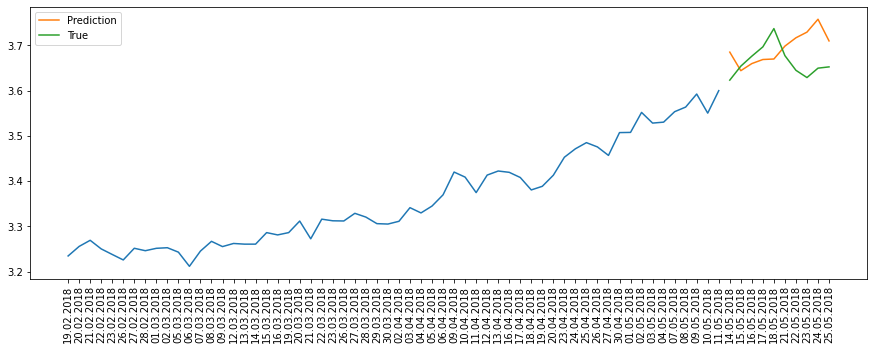

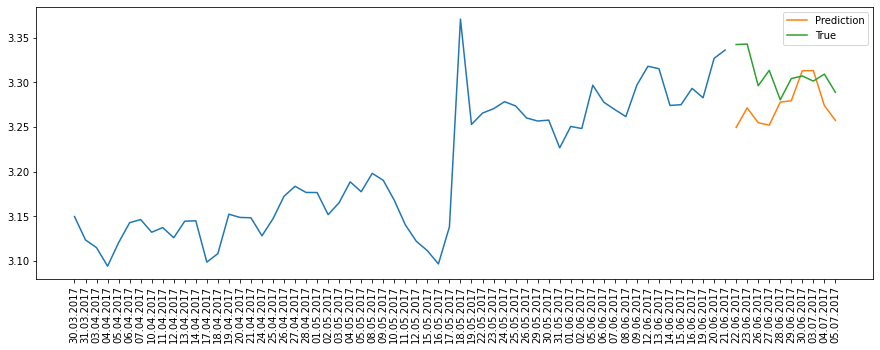

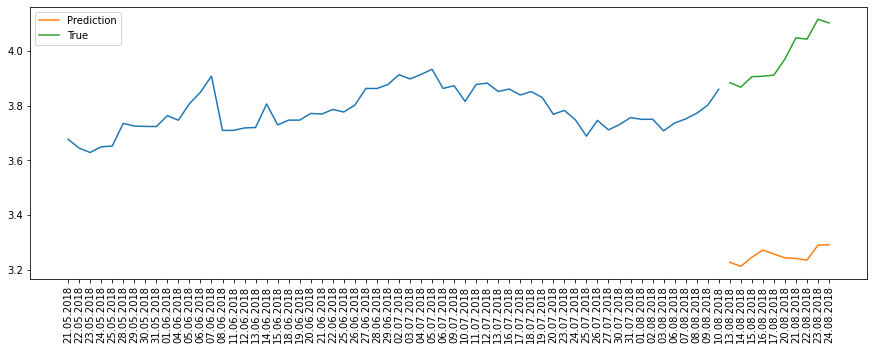

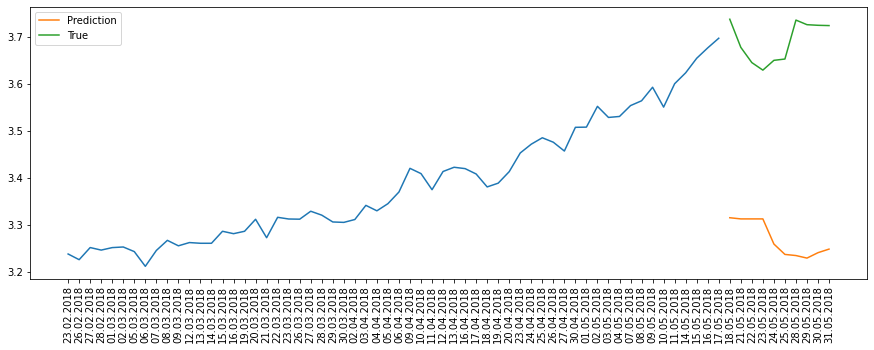

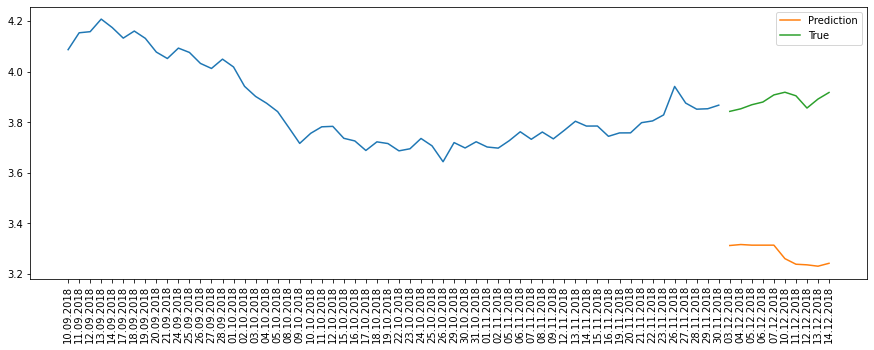

In [42]:
for k, sample in enumerate(X_val):
  plt.figure(figsize=(15, 5))
  plt.plot(range(janela), sample)
  plt.plot(range(janela, janela+horizonte), ypred[k], label='Prediction')
  plt.plot(range(janela, janela+horizonte), Y_val[k], label='True')
  plt.legend()
  plt.xticks(range(janela+horizonte), dates_val[k], rotation=90)
  plt.show()

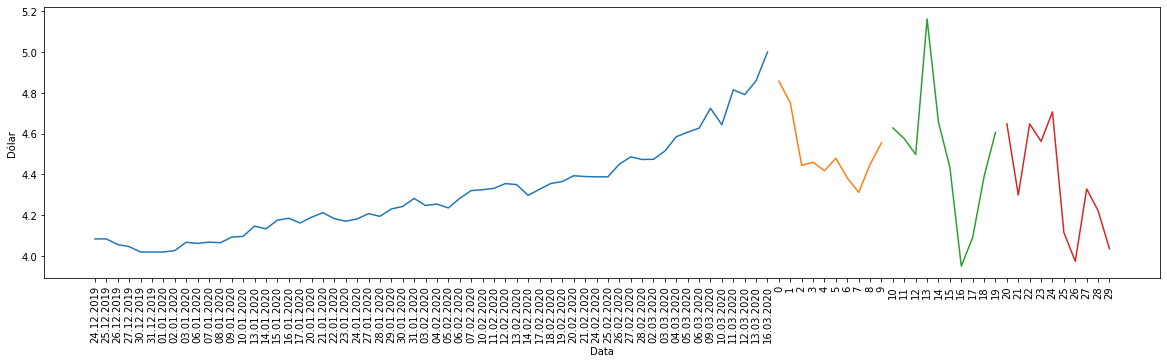

In [46]:
test_data  = data_df['Preço'][::-1].to_numpy()
test_data = test_data[-janela:]

dates = data_df['Data'][::-1].to_numpy()
dates = dates[-janela:]

steps = 3
plt.figure(figsize=(20, 5))
plt.plot(range(janela), test_data)

for i in range(steps): 
  XPoly = polynomialFeatures.transform([test_data])
  ypred = regress.predict(XPoly)

  plt.plot(range(janela + i*horizonte, janela+ (i+1)*horizonte), ypred[0], label='Prediction')
  
  xticks = np.append(dates, [str(c) for c in range(horizonte*(i+1))] )
  plt.xticks(range(janela+(i+1)*horizonte), xticks, rotation=90)

  test_data = np.append(test_data[horizonte:], ypred)

  plt.ylabel('Dólar')
  plt.xlabel('Data')